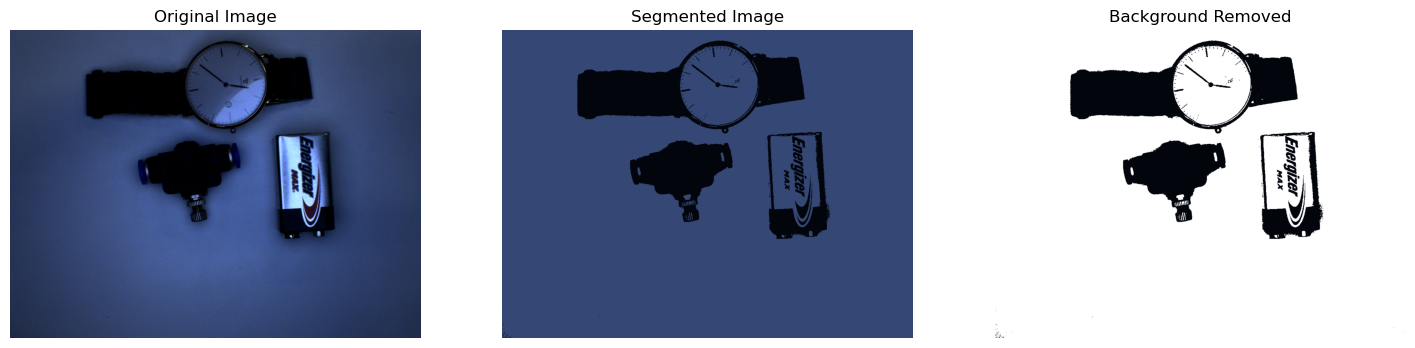

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('pic1.png')

# Check if the image was loaded
if image is None:
    raise FileNotFoundError(f"Image file '{image}' not found.")

# convert bgr to rgb
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define criteria and apply k-means clustering
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 2
# Number of clusters
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Map the labels to the center points
segmented_image = centers[labels.flatten()]

# Reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)

# Identify the background cluster
labels = labels.reshape(image.shape[:2])
unique, counts = np.unique(labels, return_counts=True)
background_cluster = unique[np.argmax(counts)]

# Create a mask for the background
mask = labels == background_cluster

# Set the background pixels to white (or any other desired color)
segmented_image_with_background_removed = segmented_image.copy()
segmented_image_with_background_removed[mask] = [255, 255, 255]  # Set to white

# Display the original, segmented, and background removed images
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(segmented_image)
plt.title('Segmented Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(segmented_image_with_background_removed)
plt.title('Background Removed')
plt.axis('off')

plt.show()